# Initial set-up

In [1]:
import pandas as pd
from datetime import date, datetime
from matplotlib import pyplot as plt
import requests
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib as np

In [2]:
## This function helps to extract the data

base_url = "https://analytics.wikimedia.org/published/datasets"
cols =["wiki_db", "project", "country", "country_code", "activity_level", "count_eps", "sum_eps", "count_release_thresh", "editors", "edits", "time"]   #Table columns 

def get_url(ds, type):
    d = datetime.strptime(ds, "%Y-%m").date()
    if d < date(2023, 7, 1) or d > date.today():
        print("Not a valid date. Please try a month between July 2023 and now")
    else:
        if type == "monthly":
            return f"{base_url}/geoeditors_monthly/{ds}.tsv"
        elif type == "weekly":
            return f"{base_url}/geoeditors_weekly/{ds}.tsv"
    return None

# Get weekly data

In [3]:
#### generates the months list ####
current_date = datetime.now()
start_date = datetime(2023, 7, 1)
date_list = []

# Generate dates from July 2023 to one month before the current month
while start_date < current_date.replace(day=1):
    date_list.append(start_date.strftime("%Y-%m"))
    start_date += timedelta(days=30)  # Add 30 days to move to the next month

date_list = list(set(date_list))
date_list.sort()
#print(date_list)

masterdf = pd.DataFrame()
user_level = ["1 to 4", "5 to 99", "100 or more"]




# Select the country
Here you change "CL" from your own Country code

In [4]:
#get dataframe for all the weeks

for i in date_list:
	try:
		ds = i
		url = get_url(ds, type="weekly")
		#print(url)
		df = pd.read_csv(url, delimiter='\t', names=cols, on_bad_lines='warn')                              
		filtered_df = df[df["country_code"] == "CL"]                                                            #CL filter
		masterdf = pd.concat([masterdf, filtered_df], axis=0, ignore_index=True)                                #Create the masterdf 
	except:
		pass


In [5]:
masterdf_filtered = masterdf[masterdf['time'] != '2024-01-24']                 #Clean up the duplicates
masterdf_filtered


,wiki_db,project,country,country_code,activity_level,count_eps,sum_eps,count_release_thresh,editors,edits,time
0,bswikisource,bs.wikisource,Chile,CL,100 or more,1.1,0.9,8,8,41,2023-06-25
1,commonswiki,en.commons,Chile,CL,1 to 4,1.1,0.9,8,49,70,2023-06-25
2,commonswiki,en.commons,Chile,CL,1 to 4,1.1,0.9,8,47,60,2023-07-02
3,commonswiki,en.commons,Chile,CL,1 to 4,1.1,0.9,8,53,67,2023-07-09
4,commonswiki,en.commons,Chile,CL,1 to 4,1.1,0.9,8,51,69,2023-07-16
...,...,...,...,...,...,...,...,...,...,...,...
463,wikidatawiki,en.wikidata,Chile,CL,1 to 4,1.1,0.9,8,99,124,2024-03-10
464,wikidatawiki,en.wikidata,Chile,CL,1 to 4,1.1,0.9,8,101,133,2024-03-17
465,frwiki,fr.wikipedia,Chile,CL,1 to 4,1.1,0.9,8,14,13,2024-03-10
466,metawiki,en.meta,Chile,CL,1 to 4,1.1,0.9,8,8,5,2024-02-25


# ESWIKI

In [6]:
eswiki = masterdf.loc[(masterdf.project == "es.wikipedia")]
eswiki = eswiki.sort_values(by="time")
eswiki_filtered = eswiki[eswiki['time'] != '2024-01-28']
eswiki_filtered

,wiki_db,project,country,country_code,activity_level,count_eps,sum_eps,count_release_thresh,editors,edits,time
22,eswiki,es.wikipedia,Chile,CL,1 to 4,1.1,0.9,8,1214,1671,2023-06-25
27,eswiki,es.wikipedia,Chile,CL,100 or more,1.1,0.9,8,15,1326,2023-06-25
32,eswiki,es.wikipedia,Chile,CL,5 to 99,1.1,0.9,8,231,4541,2023-06-25
23,eswiki,es.wikipedia,Chile,CL,1 to 4,1.1,0.9,8,1034,1404,2023-07-02
28,eswiki,es.wikipedia,Chile,CL,100 or more,1.1,0.9,8,15,1374,2023-07-02
...,...,...,...,...,...,...,...,...,...,...,...
460,eswiki,es.wikipedia,Chile,CL,100 or more,1.1,0.9,8,14,1490,2024-03-17
453,eswiki,es.wikipedia,Chile,CL,5 to 99,1.1,0.9,8,262,4726,2024-03-17
454,eswiki,es.wikipedia,Chile,CL,5 to 99,1.1,0.9,8,231,4556,2024-03-24
423,eswiki,es.wikipedia,Chile,CL,1 to 4,1.1,0.9,8,1125,1425,2024-03-24


In [7]:
##### Editors #####
eswiki_editores = eswiki_filtered.pivot(index='time', columns='activity_level', values='editors')
eswiki_editores = eswiki_editores[user_level]                     # Reorder the columns
eswiki_editores



activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-06-25,1214,231,15
2023-07-02,1034,254,15
2023-07-09,1062,266,11
2023-07-16,1236,263,14
2023-07-23,1233,227,19
2023-07-30,1183,256,13
2023-08-06,1281,238,18
2023-08-13,1231,257,16
2023-08-20,1341,236,18


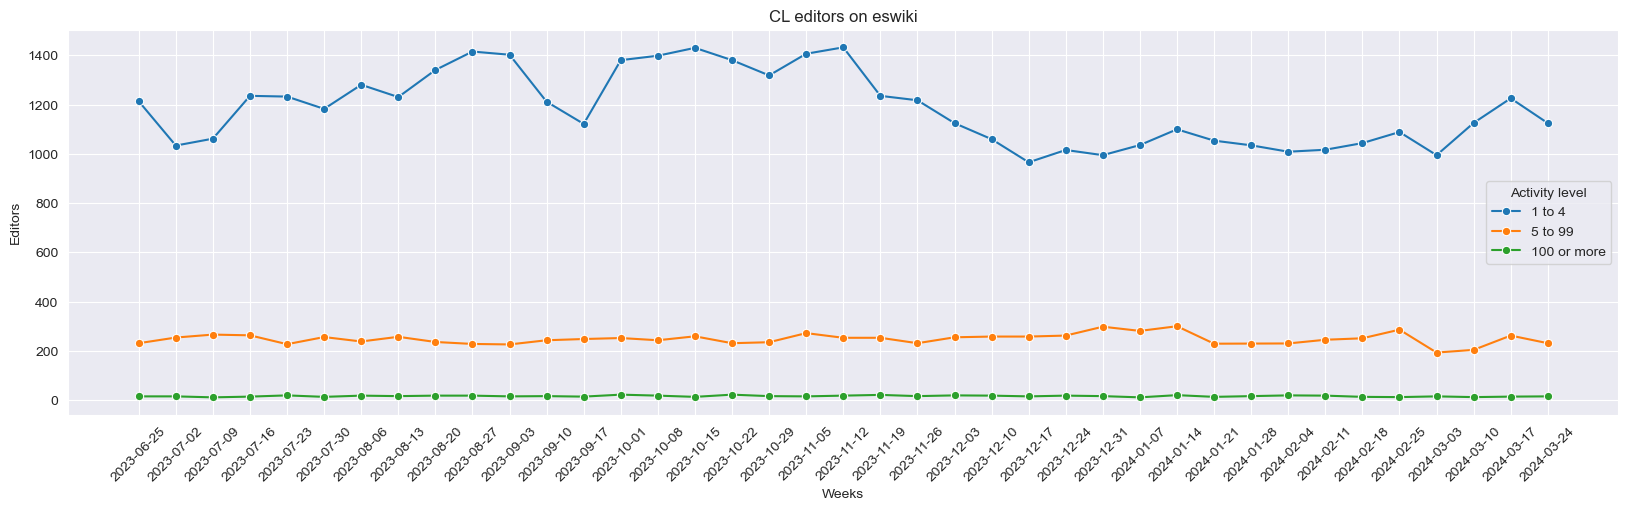

In [8]:
eswiki['editors'] = pd.to_numeric(eswiki['editors'], errors='coerce')
sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))

for level in user_level:
    subset = eswiki[eswiki.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Editors')
plt.title('CL editors on eswiki')
plt.legend(title='Activity level')
plt.show()

In [9]:
##### Edits #####

eswiki_ediciones = eswiki_filtered.pivot(index='time', columns='activity_level', values='edits')
eswiki_ediciones = eswiki_ediciones[user_level]                     # Reordenamos las columnas para que vayan en orden ascendente
eswiki_ediciones

activity_level,1 to 4,5 to 99,100 or more
time,,,
2023-06-25,1671,4541,1326
2023-07-02,1404,4090,1374
2023-07-09,1404,4918,1420
2023-07-16,1573,4812,1610
2023-07-23,1686,4146,1757
2023-07-30,1530,4928,1459
2023-08-06,1700,4431,2029
2023-08-13,1673,5038,1810
2023-08-20,1718,4434,1848


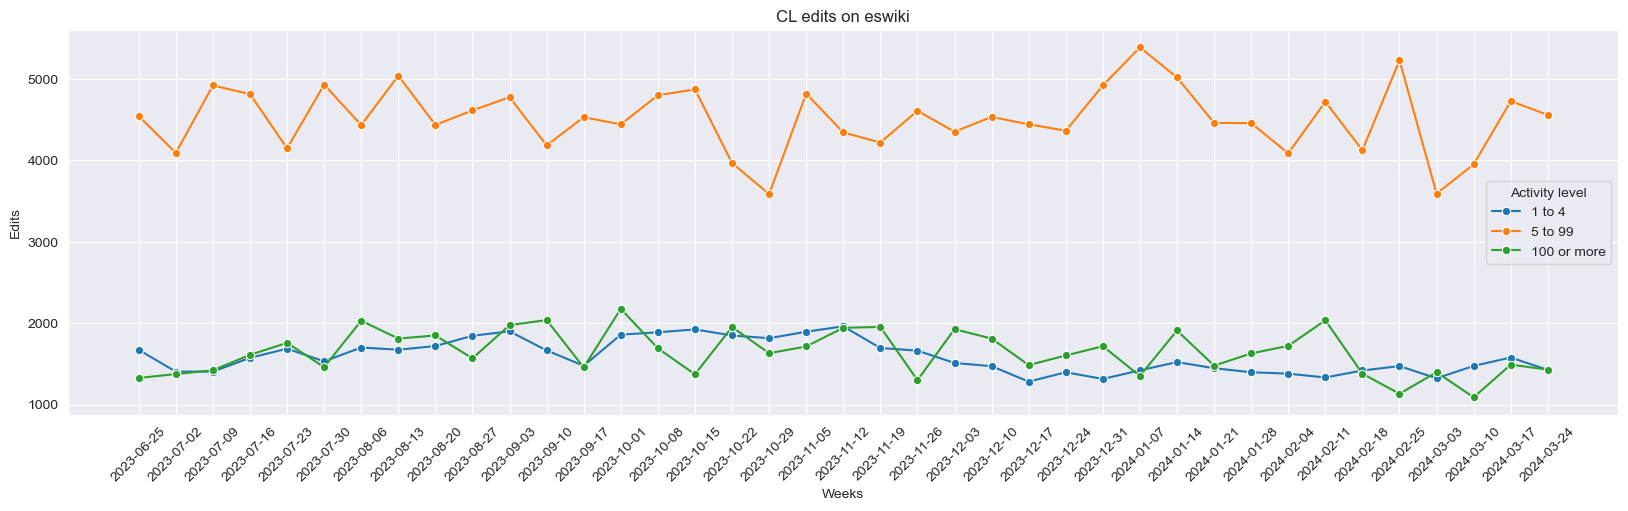

In [10]:
eswiki['edits'] = pd.to_numeric(eswiki['edits'], errors='coerce')
sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))

for level in user_level:
    subset = eswiki[eswiki.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Edits')
plt.title('CL edits on eswiki')
plt.legend(title='Activity level')
plt.show()

# WIKIDATA   

In [11]:
wikidata = masterdf.loc[(masterdf.wiki_db == "wikidatawiki")]
wikidata = wikidata.sort_values(by="time")
wikidata_filtered = wikidata[wikidata['time'] != '2024-01-28']


In [12]:
##### Editors #####
wikidata_editores = wikidata_filtered.pivot(index='time', columns='activity_level', values='editors')
wikidata_editores

activity_level,1 to 4,5 to 99
time,,
2023-06-25,85,39
2023-07-02,81,28
2023-07-09,70,27
2023-07-16,122,34
2023-07-23,99,35
2023-07-30,115,34
2023-08-06,114,30
2023-08-13,112,27
2023-08-20,116,35


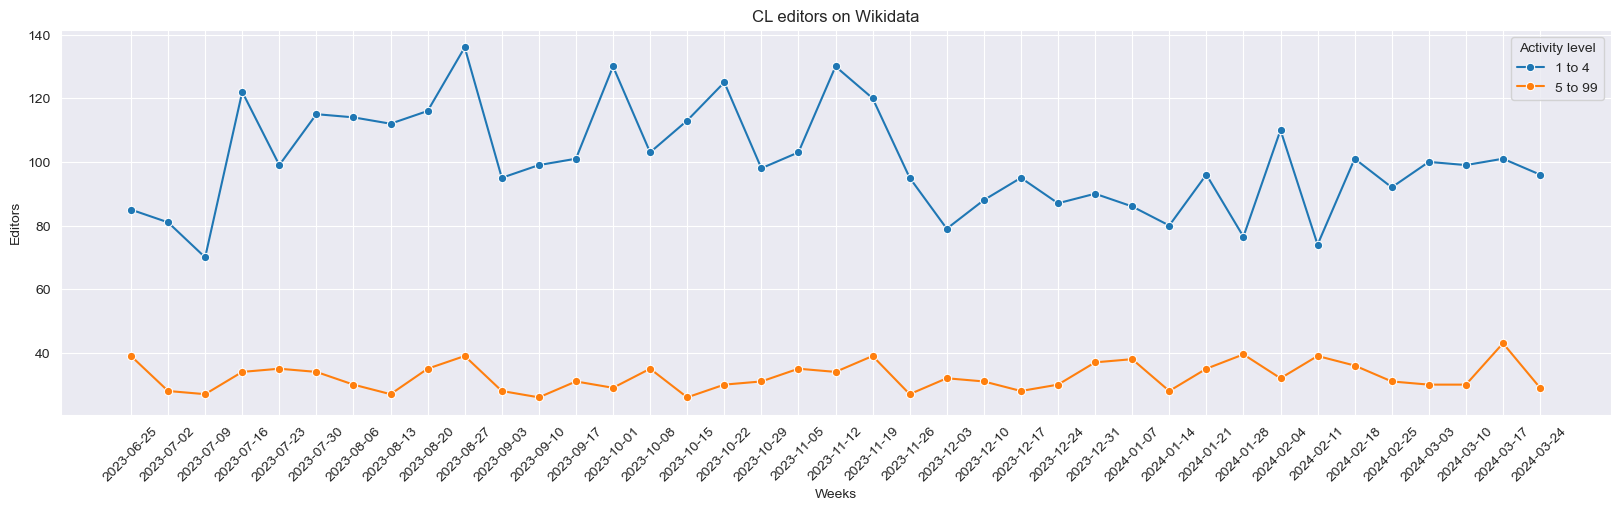

In [13]:
wikidata['editors'] = pd.to_numeric(wikidata['editors'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))
for level in user_level:
    subset = wikidata[wikidata.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Editors')
plt.title('CL editors on Wikidata')
plt.legend(title='Activity level')
plt.show()

In [14]:
##### Edits #####
wikidata_edits = wikidata_filtered.pivot(index='time', columns='activity_level', values='edits')
wikidata_edits

activity_level,1 to 4,5 to 99
time,,
2023-06-25,133,689
2023-07-02,124,352
2023-07-09,92,727
2023-07-16,148,636
2023-07-23,131,287
2023-07-30,138,684
2023-08-06,146,602
2023-08-13,139,549
2023-08-20,139,806


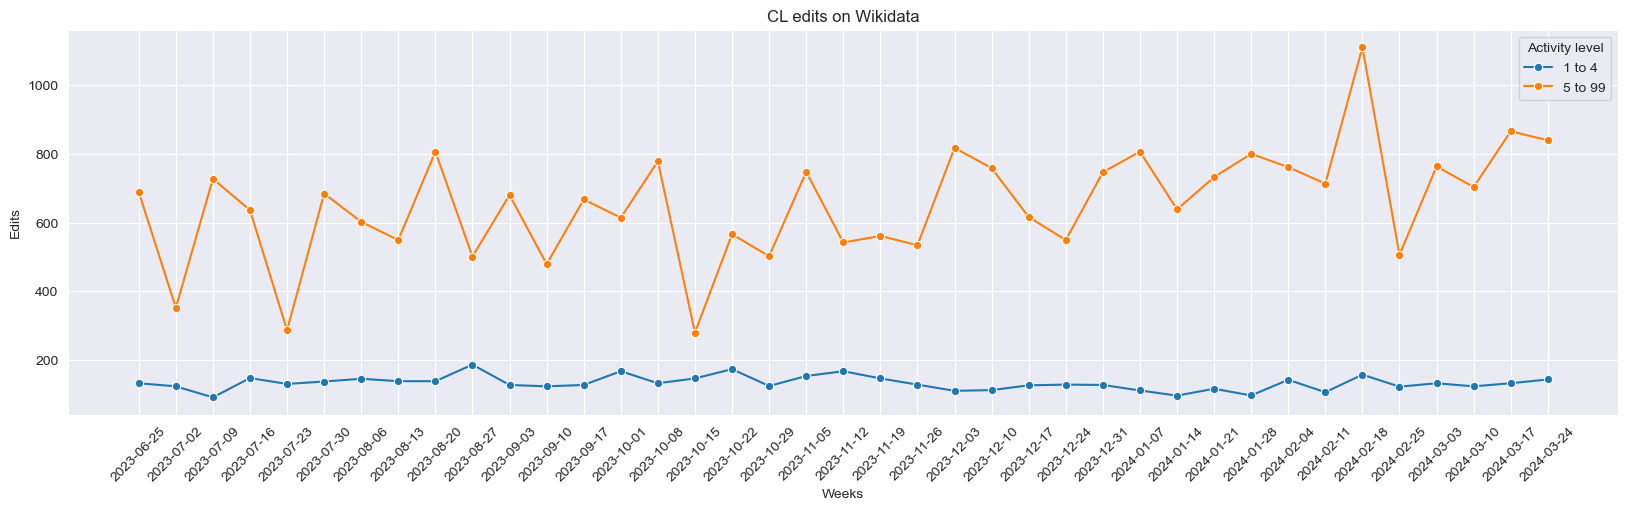

In [15]:
wikidata['edits'] = pd.to_numeric(wikidata['edits'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))
for level in user_level:
    subset = wikidata[wikidata.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Edits')
plt.title('CL edits on Wikidata')
plt.legend(title='Activity level')
plt.show()

# COMMONS

In [16]:
commons = masterdf.loc[(masterdf.wiki_db == "commonswiki")]
commons = commons.sort_values(by="time")
commons_filtered = commons[commons['time'] != '2024-01-28']

In [17]:
##### Editors #####
commons_editores = commons_filtered.pivot(index='time', columns='activity_level', values='editors')
commons_editores

activity_level,1 to 4,5 to 99
time,,
2023-06-25,49,18
2023-07-02,47,23
2023-07-09,53,28
2023-07-16,51,22
2023-07-23,44,24
2023-07-30,44,28
2023-08-06,39,26
2023-08-13,40,27
2023-08-20,59,27


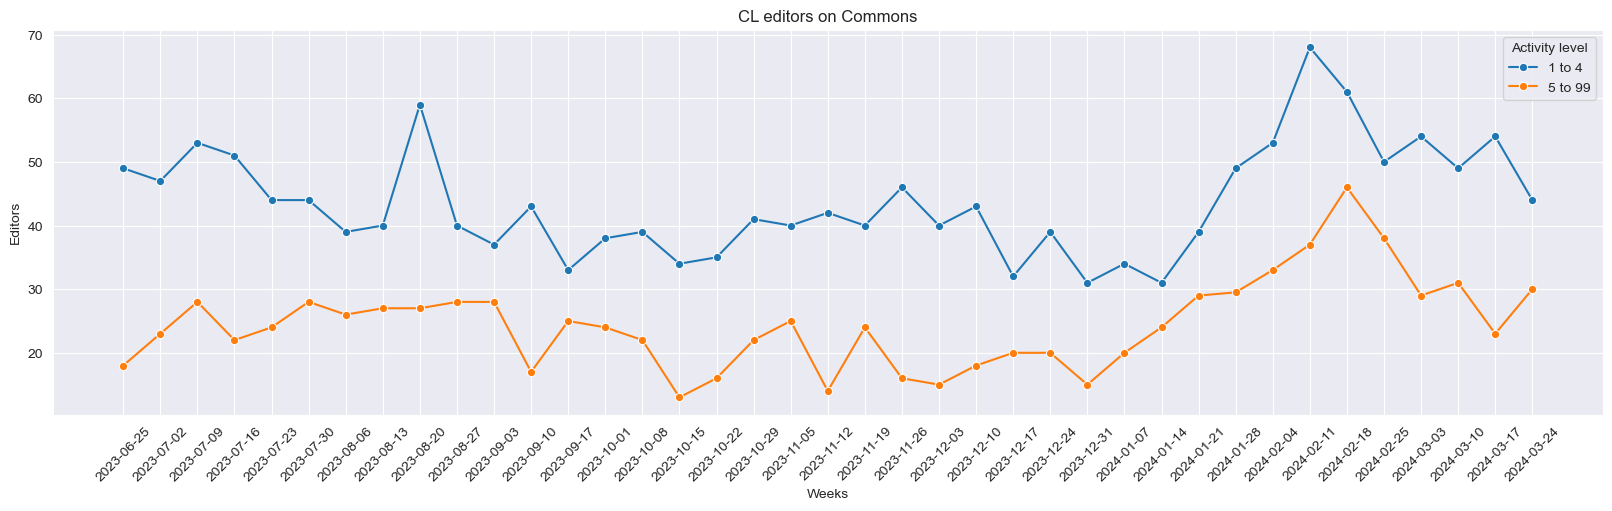

In [18]:
commons['editors'] = pd.to_numeric(commons['editors'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))

for level in user_level:
    subset = commons[commons.activity_level == level]
    sns.lineplot(data=subset, x="time", y="editors", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Editors')
plt.title('CL editors on Commons')
plt.legend(title='Activity level')
plt.show()


In [19]:
##### Edits #####
commons_ediciones = commons_filtered.pivot(index='time', columns='activity_level', values='edits')
commons_ediciones

activity_level,1 to 4,5 to 99
time,,
2023-06-25,70,427
2023-07-02,60,683
2023-07-09,67,847
2023-07-16,69,217
2023-07-23,50,650
2023-07-30,56,688
2023-08-06,58,231
2023-08-13,64,966
2023-08-20,83,493


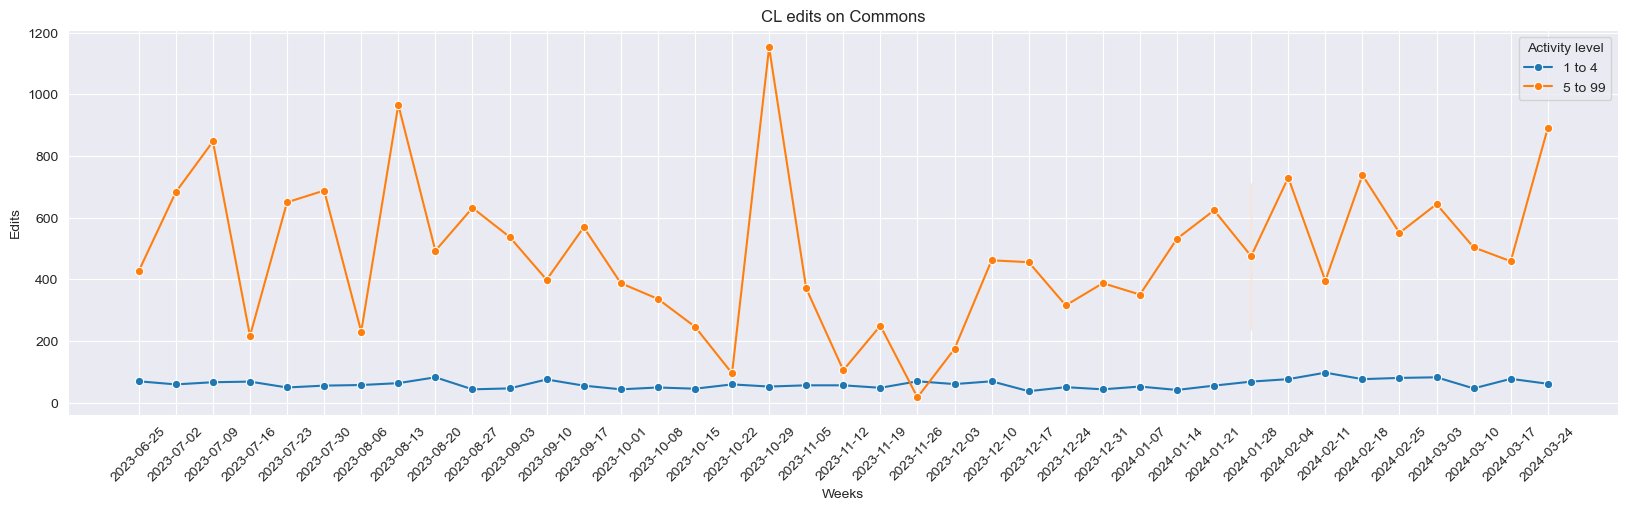

In [20]:
commons['edits'] = pd.to_numeric(commons['edits'], errors='coerce')

sns.set_style("darkgrid")
plt.figure(figsize=(20, 5))
for level in user_level:
    subset = commons[commons.activity_level == level]
    sns.lineplot(data=subset, x="time", y="edits", label=level, marker="o")

plt.xticks(rotation=45)
plt.xlabel('Weeks')
plt.ylabel('Edits')
plt.title('CL edits on Commons')
plt.legend(title='Activity level')
plt.show()